# Lab 3: Simulation
In this lab, you will learn how to create, run and interpret simulations using Python. Simulation is widely used in cases where estimates are required from complex distributions of values or a hierarchy of distributions. 
In this lab you will estimate the range of expected profitability for a lemonade stand. The profitability of the lemonade stand depends on the number of customers arriving, the profit from the drinks they order, and the tips the customer may or may not choose to leave. The distribution of possible profits is thus, the joint distribution of customer arrivals, items ordered, and tips. In practice, such a complex distribution cannot be analyzed except using simulation.

## Exercise 1: Computing Random Variables
Python offers comprehensive support for computing random variables from probability distributions. There is support in Python for a large number of ÃÂÃÂ¢ÃÂÃÂÃÂÃÂnamedÃÂÃÂ¢ÃÂÃÂÃÂÃÂ distributions; e.g. Normal, Poisson, Beta. Additionally, you can define your own functions to compute specialized probability distributions. In this exercise, you will compute and evaluate named probability distributions using Python.

In this procedure, you will compute a random set of values representing the number of customer arrivals per day at the lemonade stand. This calculation assumes that the mean number of arrivals per day is 600, with a standard deviation of 30. In practice, these parameters would be known from past history.

### Create a Function to Plot Distributions
Run the code in the cell below to create a function that plots a histogram for a specified distribution and returns summary statistics for the distribution. 

In [1]:
%matplotlib inline
def dist_summary(dist, names = 'dist_name'):
    import pandas as pd
    import matplotlib.pyplot as plt
    ser = pd.Series(dist)
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.gca()
    ser.hist(ax = ax, bins = 120)
    ax.set_title('Frequency distribution of ' + names)
    ax.set_ylabel('Frequency')
    plt.show()
    return(ser.describe())

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Simulate Customers Using a Normal Distribution
Run the code below to create a function that uses the **normal** function from the Python **numpy.random** library to generate random values drawn from a Normal distribution. Summary statistics are then computed. Two-sided confidence intervals are computed using the percentile function from the Python **numpy** library. The default values of mean = 600 and standard deviation = 30 correspond to the distribution of expected arrivals of customers at the lemonade stand.

In [2]:
def sim_normal(nums, mean = 600, sd = 30):
    import numpy as np
    import numpy.random as nr
    for n in nums:
        dist = nr.normal(loc = mean, scale = sd, size = n)
        titl = 'Normal distribution with ' + str(n) + ' values'
        print('Summary for ' + str(n) + ' samples')
        print(dist_summary(dist, titl))   
        print('Emperical 95% CIs')
        print(np.percentile(dist, [2.5, 97.5]))
        print(' ')
    return('Done!')

Run the cell below to call the **sim_normal** function for 100, 1,000, 10,000, and 100,000 values.

Summary for 100 samples


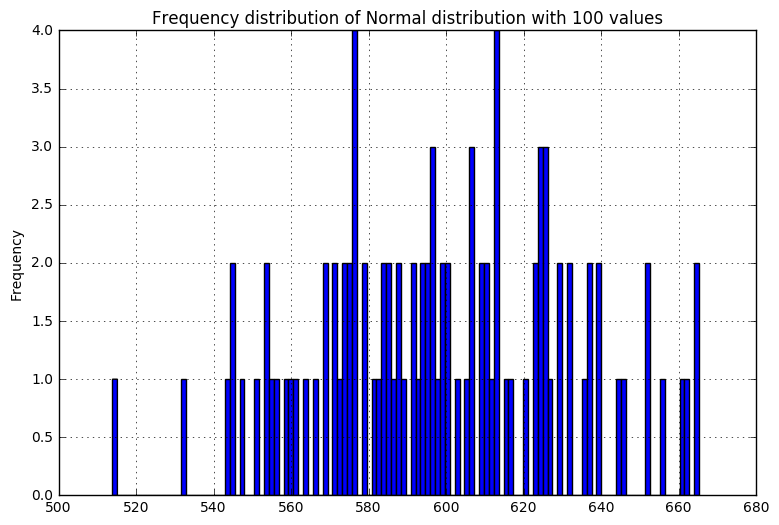

count    100.000000
mean     598.333147
std       31.990391
min      513.904194
25%      575.774396
50%      596.915047
75%      623.321523
max      665.276201
dtype: float64
Emperical 95% CIs
[ 544.07877465  661.22572349]
 
Summary for 1000 samples


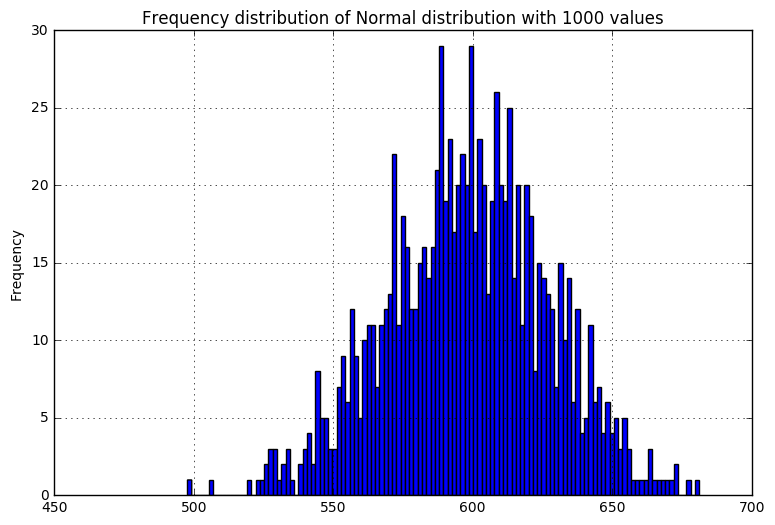

count    1000.000000
mean      597.891559
std        29.083161
min       497.754820
25%       577.708120
50%       598.525583
75%       617.254864
max       681.145504
dtype: float64
Emperical 95% CIs
[ 540.81078956  653.14631409]
 
Summary for 10000 samples


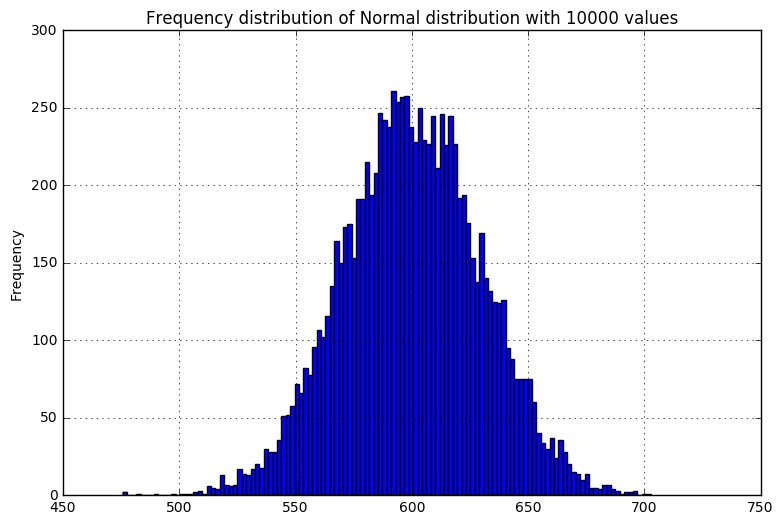

count    10000.000000
mean       600.028729
std         29.875999
min        475.794971
25%        579.837840
50%        599.721953
75%        620.043026
max        702.685226
dtype: float64
Emperical 95% CIs
[ 542.16788305  658.68266525]
 
Summary for 100000 samples


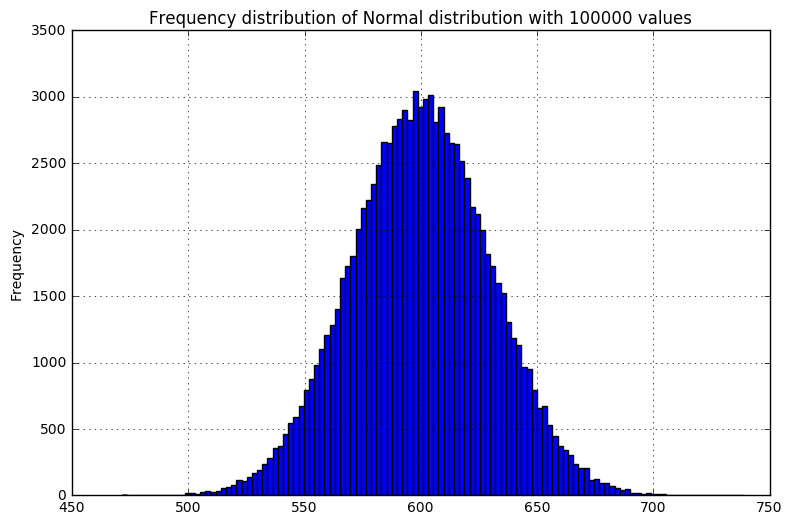

count    100000.000000
mean        599.931788
std          29.933328
min         471.653705
25%         579.736343
50%         599.927262
75%         620.034568
max         739.101447
dtype: float64
Emperical 95% CIs
[ 541.3858309   658.48007629]
 


'Done!'

In [3]:
nums = [100, 1000, 10000, 100000]
sim_normal(nums)

Examine these results, noting the following:
- The median and mean converge to the theoretical values as the number of realizations (computed values) increases from 100 to 100,000. Likewise, the confidence intervals converge to their theoretical values. 
- The histogram of computed values comes to resemble the ÃÂÃÂ¢ÃÂÃÂÃÂÃÂbell-shaped curveÃÂÃÂ¢ÃÂÃÂÃÂÃÂ of the theoretical Normal distribution as the number of realizations increases. Note that the histograms are affected by the quantization or binning of the values, which gives a somewhat bumpy appearance. 

### Simulate Customers Using a Poisson Distribution
Run the code below to create a function that simulates customer arrivals using a Poisson distribution. The operation of this code is nearly identical to the **sim_normal** function you previously used. The **poisson** function, from the **numpy.random** library, has been substituted for the **normal** function. 

In [4]:
def sim_poisson(nums, mean = 600):
    import numpy as np
    import numpy.random as nr
    for n in nums:
        dist = nr.poisson(lam = mean, size = n)
        titl = 'Poisson distribution with ' + str(n) + ' values'
        print(dist_summary(dist, titl))    
        print('Emperical 95% CIs')
        print(np.percentile(dist, [2.5, 97.5]))
        print(' ')
    return('Done!')

Run the cell below to call the **sim_normal** function for 100,000 values.

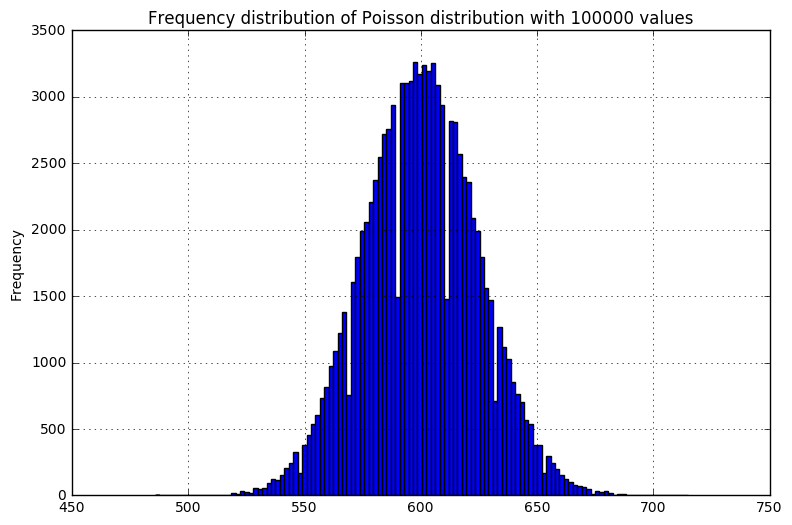

count    100000.000000
mean        599.977700
std          24.552269
min         486.000000
25%         583.000000
50%         600.000000
75%         616.000000
max         715.000000
dtype: float64
Emperical 95% CIs
[ 552.  648.]
 


'Done!'

In [5]:
sim_poisson([100000])

Examine these results for the Poisson distribution, and compare them to those for the Normal distribution. Note the following:
- The mean and median (shown here as the 50% quantile) are at the theoretical values for the Normal distribution.
- The 95% two-sided confidence intervals differ only slightly from those for the Normal distribution. 
- The values generated from a Poisson distribution are integers, which are reflected in the integer values for all the summary statistics. Further, this property leads to the uneven binning seen in the histogram.
- Despite the uneven binning, the general shape of the histogram is nearly identical to that for the Normal distribution. 
- Overall it is safe to conclude that for the large value of the mean for the number of customer arrivals there is no substantial difference between the Normal and Poisson distributions. 


## Exercise 2: Computing Specialized Random Variables
In the preceding exercise you computed random values from the Normal and Poisson distributions. There are many practical cases where a specialized distribution of values is needed. For the lemonade stand model, the profitability per order and the tip amount per customer visit are not standard distributions. In this case, you will use a Python function to compute these distributions. For the lemonade stand, assume that per order is 5 for 30% of customer visits, 3.5 for another 30% of customer visits, and 4 for the remaining 40% of visits. Assume that the tip is 0 for 50% of customer visits, 0.25 for 20% of visits, 1 for 20% of visits, and 2 for the remaining 10% of visits. 

### Compute a Distribution for Profits
Run the code below to create a function t compute a distributin for profits. This function generates random draws from a uniform distribution using the **uniform** function from the **numpy.random** library. Based on the values generated, the profit is computed using nested **if else** statements in the list comprehension.

In [6]:
def gen_profits(num):  
    import numpy.random as nr
    unif = nr.uniform(size = num)
    out = [5 if x < 0.3 else (3.5 if x < 0.6 else 4) for x in unif]
    return(out)

Run the code below to call the **gen_profits** function with 100000 values and plot the resulting distribution.

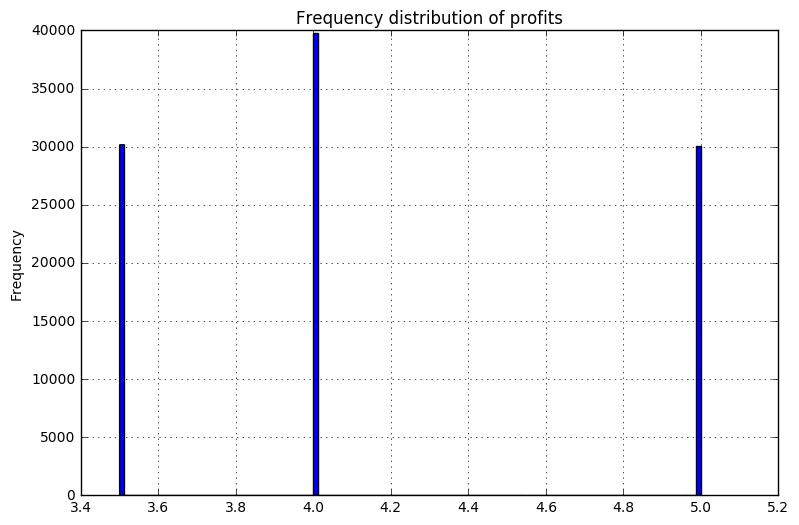

count    100000.000000
mean          4.150095
std           0.594805
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64

In [7]:
prfts = gen_profits(100000)
dist_summary(prfts, 'profits')

Note: You can see that the distribution of profits per customer visit is as expected by looking at the frequencies of each profit value. Further, the median value is the most frequent profit level of 4.0

### Compute a Distribution for Tips
Run the code below to create a function t compute a distributin for tips. This function is nearly identical to the **gen_profits** function, except that there are two levels of nesting of the **if else** statements in the list comprehension.

In [8]:
def gen_tips(num):  
    import numpy.random as nr
    unif = nr.uniform(size = num)
    out = [0 if x < 0.5 else (0.25 if x < 0.7 
      else (1.0 if x < 0.9 else 2.0)) for x in unif]
    return(out)

Run the code below to call the **gen_tips** function with 100000 values and plot the resulting distribution.

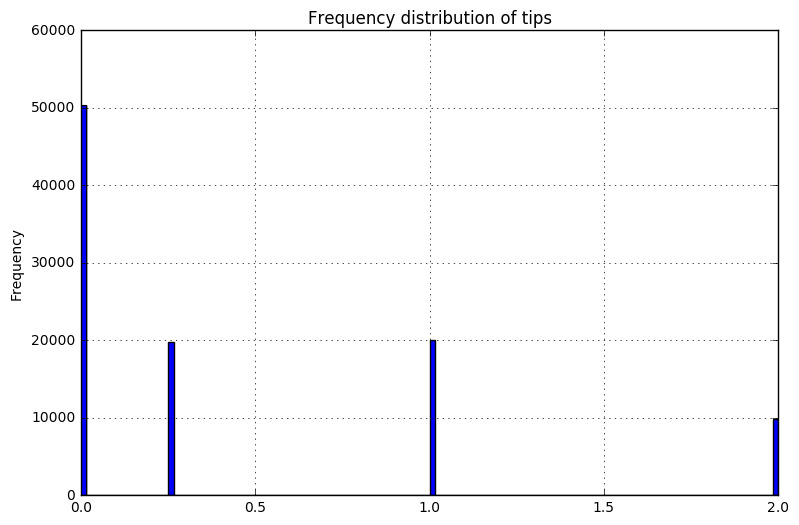

count    100000.000000
mean          0.446537
std           0.637668
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
dtype: float64

In [9]:
tps = gen_tips(100000)
dist_summary(tps, 'tips')

Note: The distribution of tip values is as expected indicating the **gen_tips** function operates correctly.

## Exercise 3: Simulating Lemonade Stand Income
In this exercise you will use Python to compute the distribution of total net daily income for the lemonade stand based on the number of visits, profit per sale, and tips. To compute total net income requires pulling together the pieces from the previous exercises and combining these results to form an overall model of lemonade stand income.

**Note**: The model represented by the code in this exercise makes some assumptions concerning independence of several of the random variables.
- The amount chanrged for lemondade is based on the weather. This means that the net profit per visit and the number of visits per day are independent. Therefore the profits on a given day can be represented by:
$$Profits_i = \Sigma_i p(arrivals_i)\ p(price_i) \\
where \\
Profits_i = net profits\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
price_i = price\ of\ lemondade\ per\ day$$  

- We will also assume that all customers on the same day leave the same tip.  This means that the tip per visit and the number of visits per day are independent. Therefore the tips on a given day can be represented by:
$$Tips_i = \Sigma_i p(arrivals_i)\ p(tip_i) \\
where \\
Tips_i = Tips\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
tip_i = tip\ for\ ith\ day$$  

- We assume that profit per cup of lemondae is independent of tip left by the customer on each day. The frequency distribution of daily net income is modeled as: 

$$P(net) = P(profit) + P(tips) \\
where P(net) = probability\ distribution\ of\ net\ income\\ 
p(profit) = distribution of daily profit, \\
p(tips) = distribution of daily tip$$ 

### Create a Function to Simulate Lemonade Stand Income
Run the code below to create a function that computes customer arrivals, profit per customer, profit per day, tips per customer, tips per day, and total daily income. Depending on the value of the pois argument, customer arrivals can be simulated from either a Normal or Poisson distribution.

In [10]:
def sim_lemonade(num, mean = 600, sd = 30, pois = False):
    ## Simulate the profits and tips for
    ## a lemonade stand.
    import numpy.random as nr
  
    ## number of customer arrivals
    if pois:
        arrivals = nr.poisson(lam = mean, size = num)
    else:
        arrivals = nr.normal(loc = mean, scale = sd, size = num) 

    print(dist_summary(arrivals, 'customer arrivals per day'))
  
    ## Compute distibution of average profit per arrival
    proft = gen_profits(num)
    print(dist_summary(proft, 'profit per arrival'))
  
    ## Total profits are profit per arrival 
    ## times number of arrivals.
    total_profit = arrivals * proft 
    print(dist_summary(total_profit, 'total profit per day'))
  
    ## Compute distribution of average tips per arrival
    tps = gen_tips(num)
    print(dist_summary(tps, 'tips per arrival'))
  
    ## Compute average tips per day
    total_tips = arrivals * tps
    print(dist_summary(total_tips, 'total tips per day'))
  
    ## Compute total profits plus total tips.
    total_take = total_profit + total_tips 
    return(dist_summary(total_take, 'total net per day'))

Run the code below to run the simulation for 100,000 values, using the default mean and standard deviation

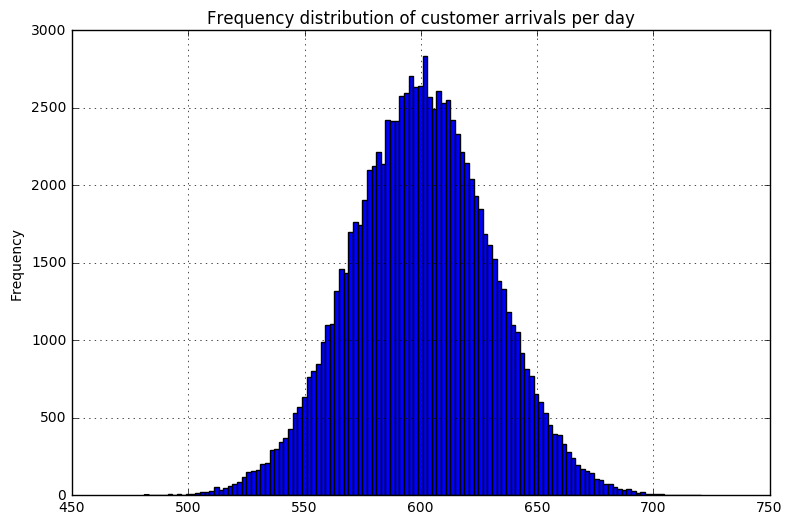

count    100000.000000
mean        600.022560
std          29.905981
min         481.138233
25%         579.755939
50%         600.067931
75%         620.125492
max         720.384333
dtype: float64


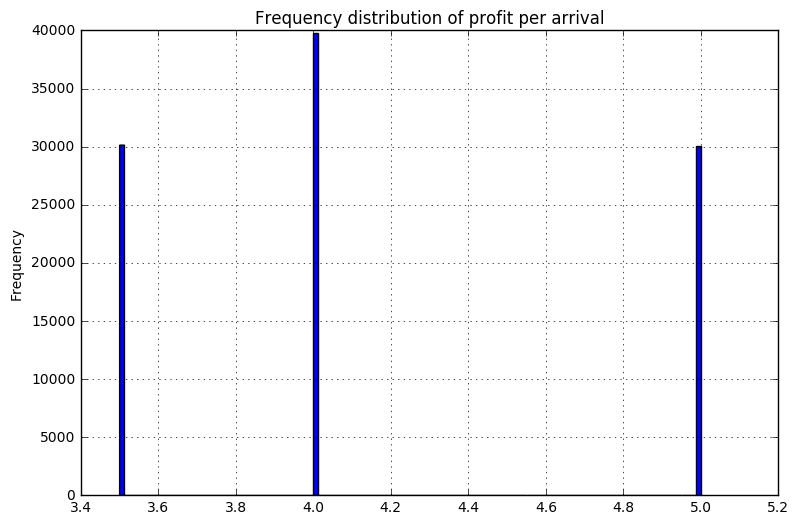

count    100000.000000
mean          4.149795
std           0.594439
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64


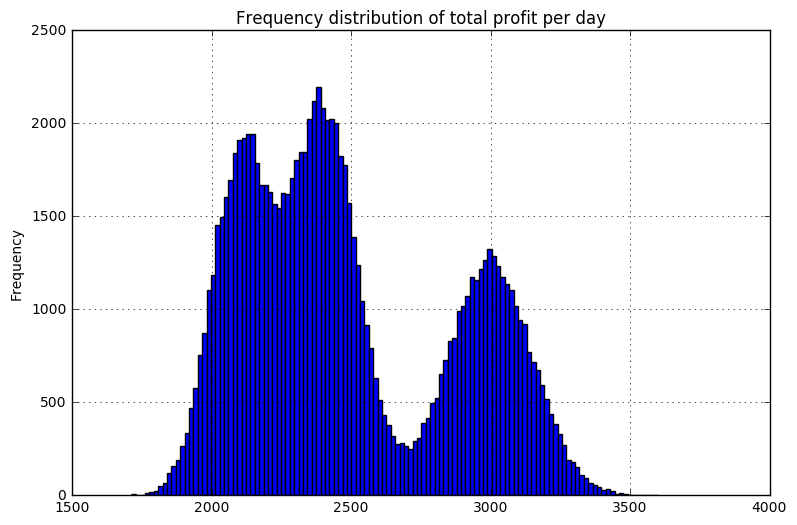

count    100000.000000
mean       2489.951529
std         377.882320
min        1714.733333
25%        2181.847964
50%        2401.169470
75%        2855.732918
max        3601.921666
dtype: float64


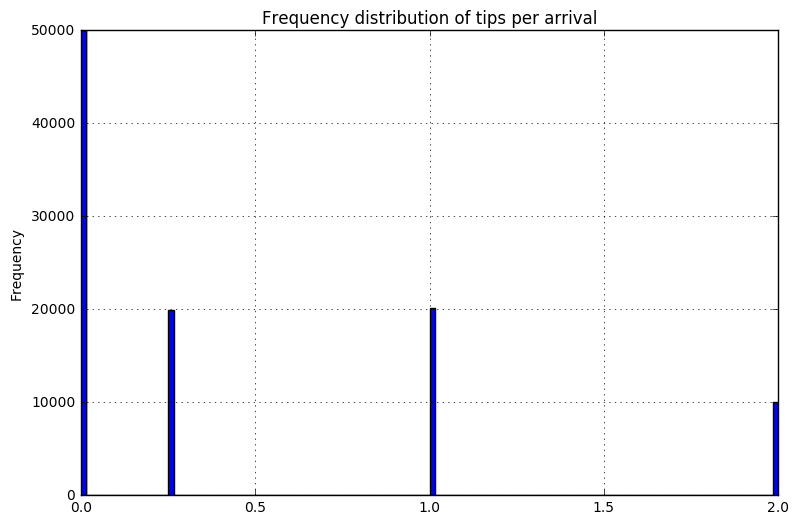

count    100000.000000
mean          0.451010
std           0.640595
min           0.000000
25%           0.000000
50%           0.250000
75%           1.000000
max           2.000000
dtype: float64


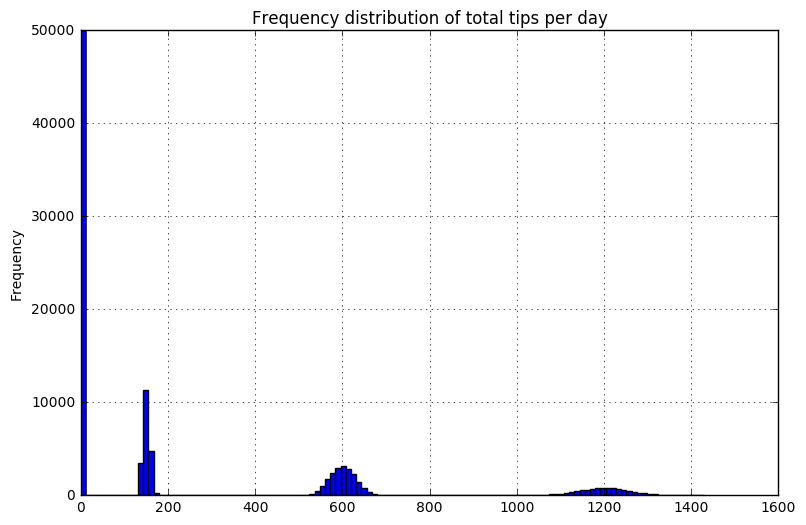

count    100000.000000
mean        270.630329
std         385.038528
min           0.000000
25%           0.000000
50%         128.444551
75%         580.304356
max        1430.255550
dtype: float64


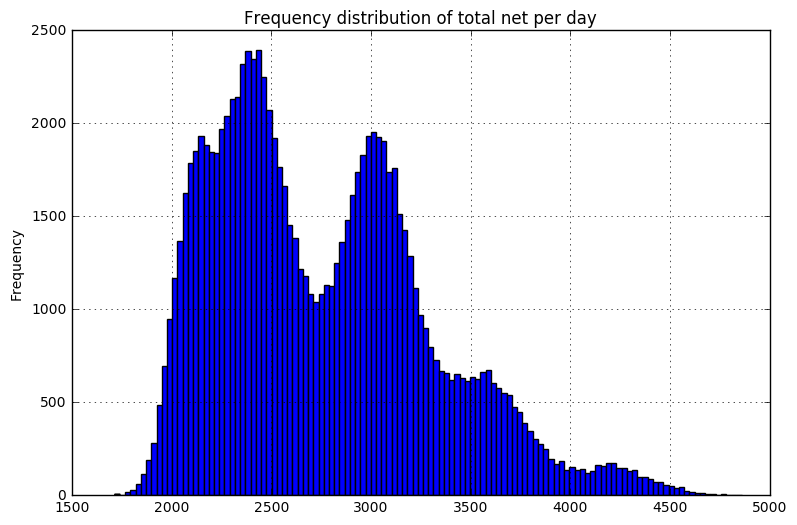

count    100000.000000
mean       2760.581857
std         543.056669
min        1714.733333
25%        2326.246204
50%        2667.058251
75%        3104.424041
max        4860.373302
dtype: float64

In [11]:
sim_lemonade(100000)

Examine each of the plots and the corresponding summary statistics. Note the following:
- The Normal distribution of the customer arrivals is as expected with a mean and median of 600. 
- The distribution of profits per arrival appears as was observed previously.
- The distribution of total profits per day, is the vector product of arrivals per day and profits per arrival. Note, that this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of tips per arrival appears as was observed previously.
- The distribution of total tips per day is the vector product of arrivals per day and tips per arrival. Again, this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of the final total net profit per day is the sum of the distribution of total profits per day and the distribution of total tips per day. This final distribution is quite complex with five peaks. 

**Questions for evaluation**

Re-run the simulation of the lemonade stand for 100,000 values with the expected number of customer arrivals per day increased to 1200 and a standard deviation of 40. Answer the following questions

1. How many distinct peaks are visible in the histogram showing frequency distribution for total net per day? 
2. Is the dispersion of total net profit greater or less than for the first simulation. 



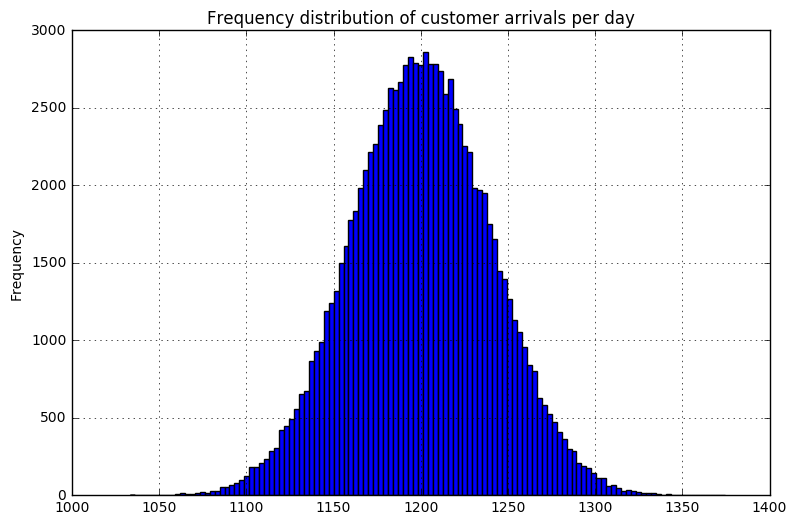

count    100000.000000
mean       1200.143122
std          40.082122
min        1033.466260
25%        1172.960364
50%        1200.058663
75%        1227.190958
max        1374.595397
dtype: float64


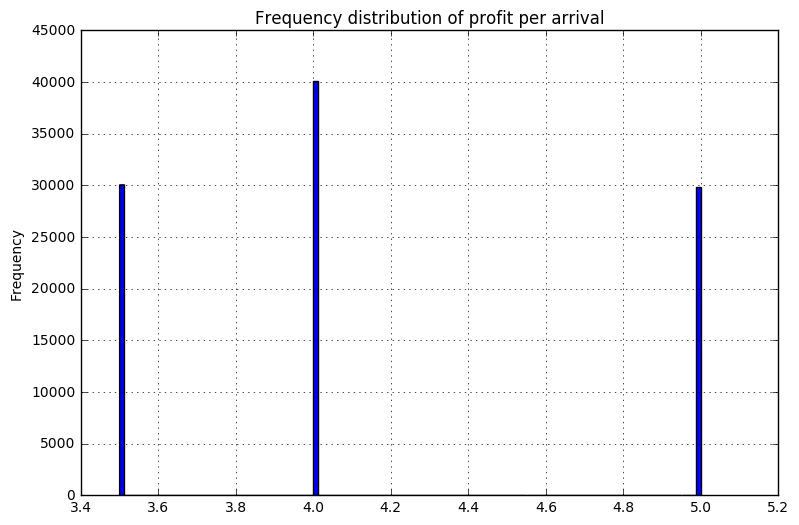

count    100000.000000
mean          4.148495
std           0.593178
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64


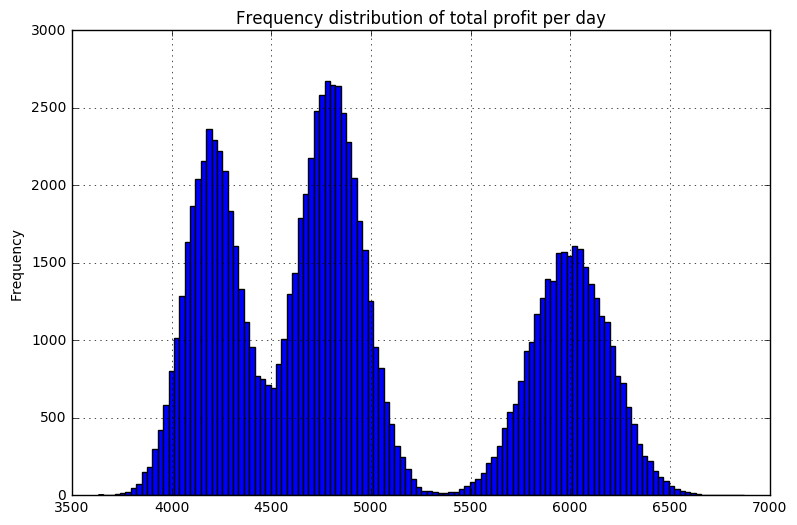

count    100000.000000
mean       4978.705388
std         730.903887
min        3633.276851
25%        4334.700203
50%        4798.246051
75%        5802.441454
max        6872.976984
dtype: float64


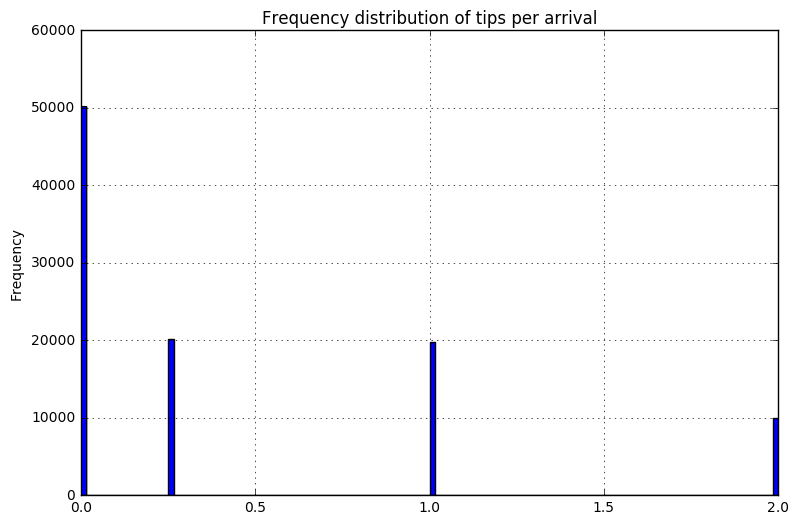

count    100000.000000
mean          0.446703
std           0.638860
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
dtype: float64


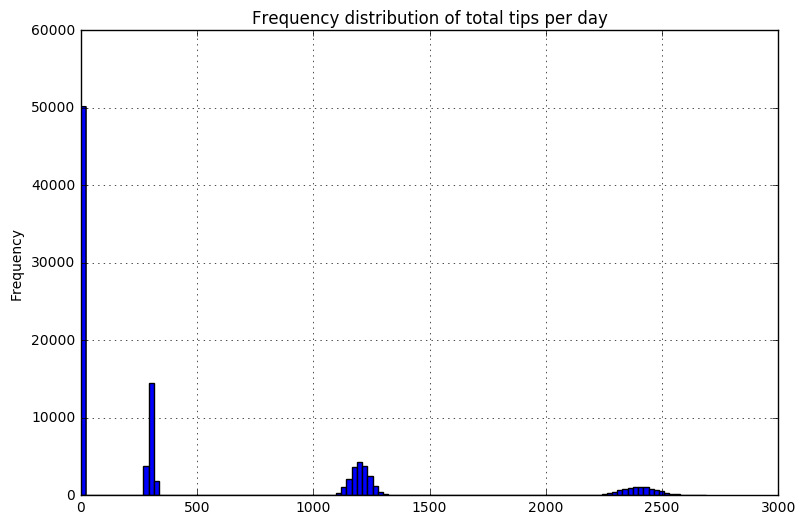

count    100000.000000
mean        536.008890
std         767.123660
min           0.000000
25%           0.000000
50%           0.000000
75%        1171.592022
max        2687.955755
dtype: float64


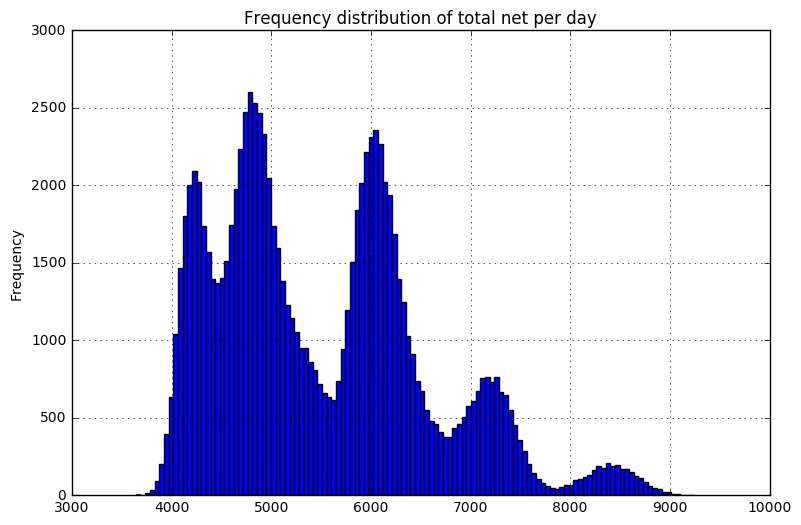

count    100000.000000
mean       5514.714277
std        1058.352818
min        3643.779272
25%        4680.691805
50%        5308.200947
75%        6164.283654
max        9243.739898
dtype: float64

In [12]:
sim_lemonade(100000, 1200, 40)

**Note**: The distributions shown in this exercises are shown in terms of frequency of the values, not probability. The distribution would need to be normalized to transform frequency to probability values.